# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
path="/content/drive/MyDrive/Python Course/foodhub_order.csv"
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 1 float, 4 integer, and 4 python objects. The data type of column 0,1,7,and 8 are integer. The data type of column 4 is float. Columnn 2,3,5, and 6 are python objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df['food_preparation_time'].describe().T

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
The minimum, average, and maximum time for food preparation are, 20, 27.4, and 35 minutes respectively.

### **Question 5:** How many orders are not rated?

In [ ]:
# Printing the count of unique values in the column 'rating'
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
In total 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

<ipython-input-98-a60d944e5496>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='Set2')


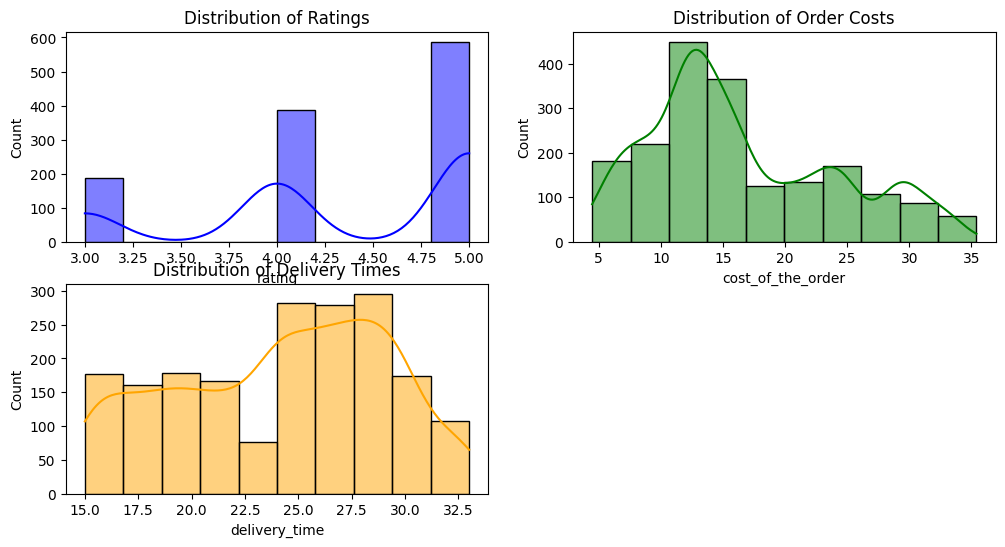

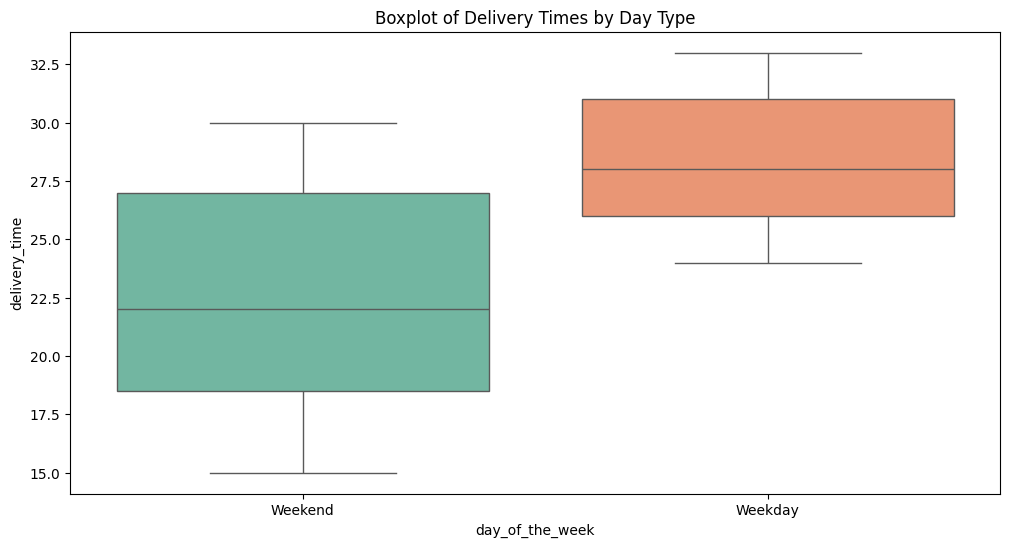

<ipython-input-98-a60d944e5496>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_the_week', data=df, palette='pastel')


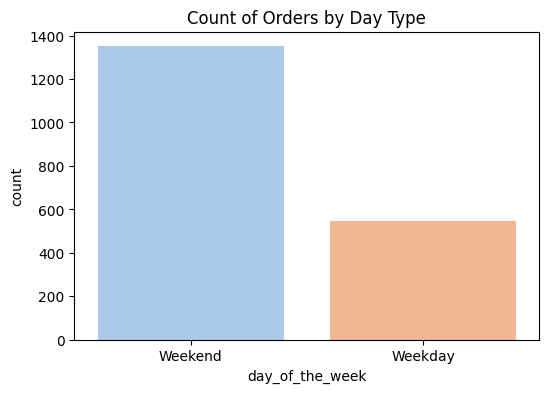

In [ ]:
# Exploratory Data Analysis (EDA)
# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['rating'], kde=True, bins=10, color='blue')
plt.title('Distribution of Ratings')

plt.subplot(2, 2, 2)
sns.histplot(df['cost_of_the_order'], kde=True, bins=10, color='green')
plt.title('Distribution of Order Costs')

plt.subplot(2, 2, 3)
sns.histplot(df['delivery_time'], kde=True, bins=10, color='orange')
plt.title('Distribution of Delivery Times')

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='Set2')
plt.title('Boxplot of Delivery Times by Day Type')
plt.show()

# Countplot for day type
plt.figure(figsize=(6, 4))
sns.countplot(x='day_of_the_week', data=df, palette='pastel')
plt.title('Count of Orders by Day Type')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Printing the unique categorical levels in column "restaurant_name"
print(df['restaurant_name'].value_counts(normalize=False)[0:5])

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
The top five restaurants are Shake Shack, The Meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

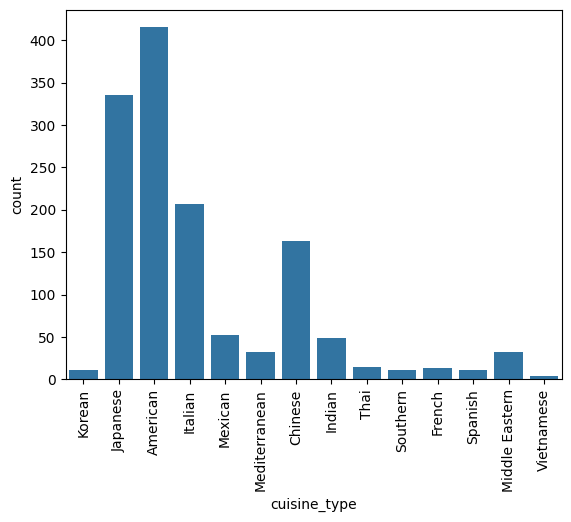

In [ ]:
# Write the code here
sns.countplot(data=df[df['day_of_the_week']=='Weekend'],x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
The most popular cuisine on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
(df['cost_of_the_order'] > 20).sum()/df.shape[0]*100

29.24130663856691

#### Observations:
29.24% of the order cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Mean of delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16%

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
 # Printing the unique categorical levels in column "customer_id"
print(df['customer_id'].value_counts(normalize=False)[0:3])

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The top three frequent customer ids are 52832, 47440, and 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

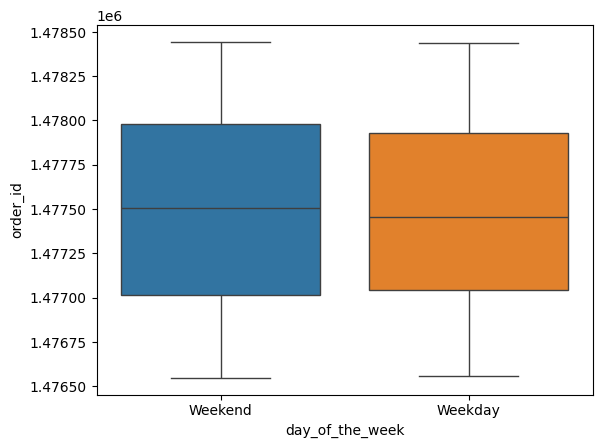

In [ ]:
# Write the code here

sns.boxplot(data=df, x='day_of_the_week', y='order_id', hue='day_of_the_week') ;


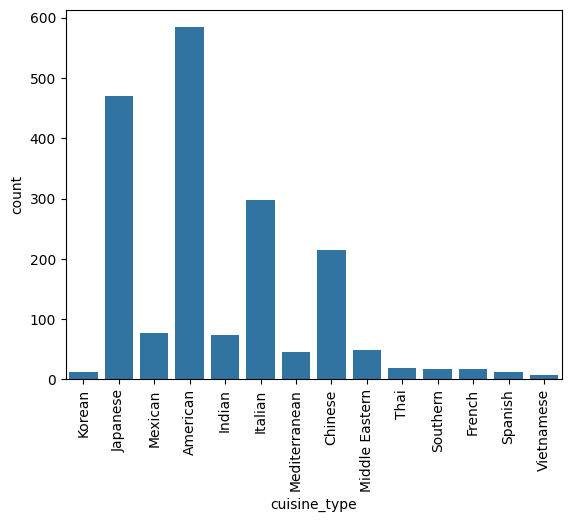

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Replacing rating of "not given" by Nan

df['rating'] = df['rating'].replace(['Not given'],np.nan)
df['rating']=df['rating'].astype(float)

#estimating rating count and its mean value
aggregated_data = df.groupby('restaurant_name').rating.agg(['mean', 'count']).reset_index()
aggregated_data.rename(columns={'mean': 'average_rating', 'count': 'rating_count'}, inplace=True)
promotional_offers = aggregated_data[(aggregated_data['rating_count'] > 50) & (aggregated_data['average_rating'] > 4)]
print("Restaurants eligible for promotional offers:")
print(promotional_offers)

Restaurants eligible for promotional offers:
               restaurant_name  average_rating  rating_count
20   Blue Ribbon Fried Chicken        4.328125            64
21           Blue Ribbon Sushi        4.219178            73
136                Shake Shack        4.278195           133
153          The Meatball Shop        4.511905            84


#### Observations:
Four restaurants are eligible for this promotional offer which are Blue ribbon Fried chicken, Blue ribbon sushi, Shake shack, and The meatball shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Calculate net revenue generated by the company
def calculate_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15
    else:
        return 0

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()

# Display the results
print("Restaurants eligible for promotional offers:")
print(promotional_offers)
print("\nTotal revenue generated by the company:", total_revenue)

Restaurants eligible for promotional offers:
               restaurant_name  average_rating  rating_count
20   Blue Ribbon Fried Chicken        4.328125            64
21           Blue Ribbon Sushi        4.219178            73
136                Shake Shack        4.278195           133
153          The Meatball Shop        4.511905            84

Total revenue generated by the company: 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Analyze delivery time
total_orders = len(df)
orders_over_60_minutes = len(df[(df['food_preparation_time'] + df['delivery_time'])> 60])
percentage_over_60 = (orders_over_60_minutes / total_orders) * 100

# Display the results
print("Restaurants eligible for promotional offers:")
print(promotional_offers)
print("\nTotal revenue generated by the company:", total_revenue)
print(f"\nPercentage of orders taking more than 60 minutes to deliver: {percentage_over_60:.2f}%")

Restaurants eligible for promotional offers:
               restaurant_name  average_rating  rating_count
20   Blue Ribbon Fried Chicken        4.328125            64
21           Blue Ribbon Sushi        4.219178            73
136                Shake Shack        4.278195           133
153          The Meatball Shop        4.511905            84

Total revenue generated by the company: 6166.303

Percentage of orders taking more than 60 minutes to deliver: 10.54%


#### Observations:
10% of the orders take more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Analyze mean delivery time by day type
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the results
print("\nMean delivery time by day type:")
print(mean_delivery_time)


Mean delivery time by day type:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
The mean delivery time in wkkend is lower than weekday.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  American cusine type is more popular,
* Only 10% of order takes more than 60 minutes
* Few restuarants have ratings more than 4.
* Comparison of weekday and weekend shows that the number of order in weekday and weekend is similar. Meaning fewer order per day during weekday.

### Recommendations:

*  Promotional offer for order taking long time may retain customers.
* Promotional offer for order during weekday may promote more orders.
* Promotions for high rating restaurants will improve creditability.

In [99]:
!pip install nbconvert

In [100]:
! jupyter nbconvert --to html  'FDS_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] WARNING | pattern 'FDS_Project_LearnerNotebook_FullCode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answe

---